In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [4]:
df.shape

(69999, 172)

In [5]:
df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [6]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  onnet_mou_6               float64
 12  onnet_mou_7               float64
 13  onnet_mou_8               float64
 14  offnet_mou_6              float64
 15  offnet_mou_7              float64
 16  offnet_mou_8              float64
 17  roam_ic_mou_6             float64
 18  roam_ic_mou_7             float64
 19  roam_ic_mou_8             float64
 20  roam_og_mou_6             f

In [7]:
df.describe(include='all')

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999,69600,69266,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,68898,68765,67538,69999.000000,69999.000000

In [8]:
df['id'].nunique()

69999

In [9]:
df.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [10]:
obj_cols = df.select_dtypes(['object']).columns.tolist()
obj_cols


['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [11]:
df[obj_cols].describe()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
count,69999,69600,69266,68898,68765,67538,17568,17865,18417
unique,1,1,1,30,31,31,30,31,31
top,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014
freq,69999,69600,69266,11880,12206,10324,1317,1282,1388


In [12]:
df[obj_cols].isnull().sum()*100/df.shape[0]

last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
date_of_last_rech_6          1.572880
date_of_last_rech_7          1.762882
date_of_last_rech_8          3.515765
date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
dtype: float64

In [13]:
df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace = True)
print(df.shape)
test_df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], axis = 1, inplace = True)
print(test_df.shape)

(69999, 169)
(30000, 168)


In [14]:
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'])
df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'])
df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'])
test_df['last_date_of_month_6'] = pd.to_datetime(test_df['last_date_of_month_6'])
test_df['last_date_of_month_7'] = pd.to_datetime(test_df['last_date_of_month_7'])
test_df['last_date_of_month_8'] = pd.to_datetime(test_df['last_date_of_month_8'])

In [15]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])
test_df['date_of_last_rech_6'] = pd.to_datetime(test_df['date_of_last_rech_6'])
test_df['date_of_last_rech_7'] = pd.to_datetime(test_df['date_of_last_rech_7'])
test_df['date_of_last_rech_8'] = pd.to_datetime(test_df['date_of_last_rech_8'])

In [16]:
print(df.select_dtypes(include='datetime').columns)
print(test_df.select_dtypes(include='datetime').columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')
Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')


In [17]:
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og

In [18]:
df['circle_id'].nunique()

1

In [19]:
# Creating columm lists by types

id_cols = ['id', 'circle_id']


cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8']



In [20]:
# print number of columbns in each list
print("id len: %d\nCategory: %d" % (len(id_cols),len(cat_cols)))

id len: 2
Category: 6


## Handling Missing Values

In [21]:
df.isnull().sum()*100/df.shape[0]


id                       0.000000
circle_id                0.000000
loc_og_t2o_mou           1.002871
std_og_t2o_mou           1.002871
loc_ic_t2o_mou           1.002871
last_date_of_month_6     0.000000
last_date_of_month_7     0.570008
last_date_of_month_8     1.047158
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              3.954342
onnet_mou_7              3.838626
onnet_mou_8              5.290076
offnet_mou_6             3.954342
offnet_mou_7             3.838626
offnet_mou_8             5.290076
roam_ic_mou_6            3.954342
roam_ic_mou_7            3.838626
roam_ic_mou_8            5.290076
roam_og_mou_6            3.954342
roam_og_mou_7            3.838626
roam_og_mou_8            5.290076
loc_og_t2t_mou_6         3.954342
loc_og_t2t_mou_7         3.838626
loc_og_t2t_mou_8         5.290076
loc_og_t2m_mou_6         3.954342
loc_og_t2m_mou_7         3.838626
loc_og_t2m_mou_8         5.290076
loc_og_t2f_mou

In [22]:
test_df.isnull().sum()*100/test_df.shape[0]

id                       0.000000
circle_id                0.000000
loc_og_t2o_mou           1.053333
std_og_t2o_mou           1.053333
loc_ic_t2o_mou           1.053333
last_date_of_month_6     0.000000
last_date_of_month_7     0.673333
last_date_of_month_8     1.223333
arpu_6                   0.000000
arpu_7                   0.000000
arpu_8                   0.000000
onnet_mou_6              3.896667
onnet_mou_7              3.906667
onnet_mou_8              5.583333
offnet_mou_6             3.896667
offnet_mou_7             3.906667
offnet_mou_8             5.583333
roam_ic_mou_6            3.896667
roam_ic_mou_7            3.906667
roam_ic_mou_8            5.583333
roam_og_mou_6            3.896667
roam_og_mou_7            3.906667
roam_og_mou_8            5.583333
loc_og_t2t_mou_6         3.896667
loc_og_t2t_mou_7         3.906667
loc_og_t2t_mou_8         5.583333
loc_og_t2m_mou_6         3.896667
loc_og_t2m_mou_7         3.906667
loc_og_t2m_mou_8         5.583333
loc_og_t2f_mou

In [23]:
recharge_cols = ['total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8']

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,5920.000000,4365.000000,4076.000000


In [24]:
test_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000
mean,2.454977,2.634960,2.650972,192.068004,199.880903,199.178710
std,2.776552,2.932158,3.013204,197.264397,193.146529,189.006928
min,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000
25%,1.000000,1.000000,1.000000,82.000000,92.000000,91.000000
50%,1.000000,1.000000,1.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000
max,55.000000,44.000000,57.000000,7546.000000,3765.000000,2520.000000


In [25]:
df[recharge_cols] = df[recharge_cols].apply(lambda x: x.fillna(0))

In [26]:
test_df[recharge_cols] = df[recharge_cols].apply(lambda x: x.fillna(0))

In [27]:
df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 169 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id                    int64         
 1   circle_id             int64         
 2   loc_og_t2o_mou        float64       
 3   std_og_t2o_mou        float64       
 4   loc_ic_t2o_mou        float64       
 5   last_date_of_month_6  datetime64[ns]
 6   last_date_of_month_7  datetime64[ns]
 7   last_date_of_month_8  datetime64[ns]
 8   arpu_6                float64       
 9   arpu_7                float64       
 10  arpu_8                float64       
 11  onnet_mou_6           float64       
 12  onnet_mou_7           float64       
 13  onnet_mou_8           float64       
 14  offnet_mou_6          float64       
 15  offnet_mou_7          float64       
 16  offnet_mou_8          float64       
 17  roam_ic_mou_6         float64       
 18  roam_ic_mou_7         float64       
 19  roa

In [28]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
            ]

In [29]:
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))
test_df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [30]:
cols_to_drop = df.columns[round(100*df.isnull().sum()/df.shape[0],2)>70]
cols_to_drop = [col for col in cols_to_drop if col not in recharge_cols]
df.drop(cols_to_drop, axis = 1, inplace=True)
test_df.drop(cols_to_drop, axis = 1, inplace=True)
print(df.shape)
print(test_df.shape)

(69999, 154)
(30000, 153)


In [31]:
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

num_cols = df.select_dtypes(include = np.number).columns.tolist()

for col in num_cols:
    df[col].fillna(0, inplace = True)
    

In [32]:
test_df[test_df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = test_df[test_df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)
num_cols.remove('churn_probability')
for col in num_cols:
    test_df[col].fillna(0, inplace = True)

In [33]:
print(df.isnull().sum())

id                         0
circle_id                  0
loc_og_t2o_mou             0
std_og_t2o_mou             0
loc_ic_t2o_mou             0
last_date_of_month_6       0
last_date_of_month_7     399
last_date_of_month_8     733
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou_7           0
loc_og_t2m_mou_8           0
loc_og_t2f_mou_6           0
loc_og_t2f_mou_7           0
loc_og_t2f_mou_8           0
loc_og_t2c_mou_6           0
loc_og_t2c_mou_7           0
loc_og_t2c_mou

In [34]:
print(test_df.isnull().sum())

id                         0
circle_id                  0
loc_og_t2o_mou             0
std_og_t2o_mou             0
loc_ic_t2o_mou             0
last_date_of_month_6       0
last_date_of_month_7     202
last_date_of_month_8     367
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6                0
onnet_mou_7                0
onnet_mou_8                0
offnet_mou_6               0
offnet_mou_7               0
offnet_mou_8               0
roam_ic_mou_6              0
roam_ic_mou_7              0
roam_ic_mou_8              0
roam_og_mou_6              0
roam_og_mou_7              0
roam_og_mou_8              0
loc_og_t2t_mou_6           0
loc_og_t2t_mou_7           0
loc_og_t2t_mou_8           0
loc_og_t2m_mou_6           0
loc_og_t2m_mou_7           0
loc_og_t2m_mou_8           0
loc_og_t2f_mou_6           0
loc_og_t2f_mou_7           0
loc_og_t2f_mou_8           0
loc_og_t2c_mou_6           0
loc_og_t2c_mou_7           0
loc_og_t2c_mou

In [35]:
df.nunique().sort_values(ascending=False)

id                      69999
arpu_6                  61615
arpu_7                  61425
arpu_8                  60194
total_og_mou_7          33195
total_og_mou_6          33135
total_og_mou_8          32897
total_ic_mou_6          27432
total_ic_mou_7          27418
total_ic_mou_8          27318
offnet_mou_6            26254
offnet_mou_7            26139
offnet_mou_8            25995
loc_ic_mou_6            24442
loc_ic_mou_7            24258
loc_ic_mou_8            24182
loc_og_mou_6            22309
std_og_mou_7            22088
loc_og_mou_7            22012
loc_og_mou_8            21950
std_og_mou_6            21837
std_og_mou_8            21745
onnet_mou_7             20076
onnet_mou_6             20057
onnet_mou_8             19725
loc_ic_t2m_mou_6        19034
loc_ic_t2m_mou_8        19022
loc_ic_t2m_mou_7        18945
loc_og_t2m_mou_6        17848
loc_og_t2m_mou_7        17641
loc_og_t2m_mou_8        17616
std_og_t2m_mou_7        16234
std_og_t2m_mou_6        16059
std_og_t2m

In [36]:
df.shape

(69999, 154)

In [37]:
cols = df.columns[df.isnull().any()].tolist()
df[cols].isnull().sum()*100/df.shape[0]

last_date_of_month_7    0.570008
last_date_of_month_8    1.047158
date_of_last_rech_6     1.572880
date_of_last_rech_7     1.762882
date_of_last_rech_8     3.515765
dtype: float64

In [38]:
cols1 = test_df.columns[test_df.isnull().any()].tolist()
test_df[cols1].isnull().sum()*100/test_df.shape[0]

last_date_of_month_7    0.673333
last_date_of_month_8    1.223333
date_of_last_rech_6     1.686667
date_of_last_rech_7     1.776667
date_of_last_rech_8     3.870000
dtype: float64

In [39]:
df.shape

(69999, 154)

In [40]:
test_df.shape

(30000, 153)

In [41]:
df['total_data_rech_amt_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_amt_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [42]:
df['av_data_rech_amt_6_7'] = (df['total_data_rech_amt_6'] + df['total_data_rech_amt_7'])/2

In [43]:
print(df.av_data_rech_amt_6_7.quantile(0.7))

12.5


In [44]:
high_value_cust = df.loc[df.av_data_rech_amt_6_7 > df.av_data_rech_amt_6_7.quantile(0.7), :]
print(high_value_cust.shape)

(20641, 157)


In [45]:
## Deleting variable used to filter high value customers
high_value_cust = high_value_cust.drop(['total_data_rech_amt_6','total_data_rech_amt_7','av_data_rech_amt_6_7'],axis = 1)
high_value_cust.shape

(20641, 154)

In [46]:
cols = high_value_cust.columns[high_value_cust.isnull().any()].tolist()
high_value_cust[cols].isnull().sum()*100/high_value_cust.shape[0]

last_date_of_month_7    0.184100
last_date_of_month_8    0.770312
date_of_last_rech_6     0.591057
date_of_last_rech_7     0.678262
date_of_last_rech_8     2.407829
dtype: float64

In [47]:
test_df[cols].isnull().sum()*100/test_df.shape[0]

last_date_of_month_7    0.673333
last_date_of_month_8    1.223333
date_of_last_rech_6     1.686667
date_of_last_rech_7     1.776667
date_of_last_rech_8     3.870000
dtype: float64

In [48]:
high_val_cust = high_value_cust

In [49]:
high_val_cust.shape

(20641, 154)

In [50]:
high_val_cust.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                      'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                                     , axis = 1, inplace=True)


In [51]:
test_df.drop(['last_date_of_month_7','last_date_of_month_8',
                                      'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                                     , axis = 1, inplace=True)

In [52]:
print(high_val_cust.shape)
print(test_df.shape)

(20641, 148)
(30000, 148)


In [53]:
high_val_cust.isnull().sum()*100/high_val_cust.shape[0]

id                    0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_m

### Churn Derivation

In [54]:
high_val_cust['total_calls_mou_8'] = high_val_cust.total_ic_mou_8 + high_val_cust.total_og_mou_8
high_val_cust['total_int_mb_8'] = high_val_cust.vol_3g_mb_8 + high_val_cust.vol_2g_mb_8

test_df['total_calls_mou_8'] = test_df.total_ic_mou_8 + test_df.total_og_mou_8
test_df['total_int_mb_8'] = test_df.vol_3g_mb_8 + test_df.vol_2g_mb_8

In [55]:
# 0 as not churn , 1 as churn
high_val_cust['churn'] = high_val_cust.apply(lambda x : 1 if(x.total_calls_mou_8 == 0 and x.total_int_mb_8 == 0) else 0, axis = 1)
test_df['churn'] = test_df.apply(lambda x : 1 if(x.total_calls_mou_8 == 0 and x.total_int_mb_8 == 0) else 0, axis = 1)

In [56]:
high_val_cust.shape

(20641, 151)

In [57]:
test_df.shape

(30000, 151)

In [58]:
high_val_cust = high_val_cust.drop(['total_calls_mou_8', 'total_int_mb_8'], axis = 1)
test_df = test_df.drop(['total_calls_mou_8', 'total_int_mb_8'], axis = 1)

In [59]:
high_val_cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Data columns (total 149 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   circle_id           int64  
 2   loc_og_t2o_mou      float64
 3   std_og_t2o_mou      float64
 4   loc_ic_t2o_mou      float64
 5   arpu_6              float64
 6   arpu_7              float64
 7   arpu_8              float64
 8   onnet_mou_6         float64
 9   onnet_mou_7         float64
 10  onnet_mou_8         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  roam_ic_mou_6       float64
 15  roam_ic_mou_7       float64
 16  roam_ic_mou_8       float64
 17  roam_og_mou_6       float64
 18  roam_og_mou_7       float64
 19  roam_og_mou_8       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2m_mou_6    float64
 24  loc_og_t2m_mou_7    float64

In [60]:
high_val_cust.shape

(20641, 149)

In [61]:
print("Churn Ratio")
high_val_cust.churn.value_counts()*100/high_val_cust.shape[0]

Churn Ratio


0    94.321981
1     5.678019
Name: churn, dtype: float64

### EDA

In [62]:
print(num_cols)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',

In [63]:
print(cat_cols)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [64]:
cat_cols.append('churn')
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"),axis = 0)
test_df[cat_cols] = test_df[cat_cols].apply(lambda column: column.astype("category"),axis = 0)

In [65]:
#### Creating functions for univariate, bivariate analysis
high_val_cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Data columns (total 149 columns):
 #   Column              Dtype   
---  ------              -----   
 0   id                  int64   
 1   circle_id           int64   
 2   loc_og_t2o_mou      float64 
 3   std_og_t2o_mou      float64 
 4   loc_ic_t2o_mou      float64 
 5   arpu_6              float64 
 6   arpu_7              float64 
 7   arpu_8              float64 
 8   onnet_mou_6         float64 
 9   onnet_mou_7         float64 
 10  onnet_mou_8         float64 
 11  offnet_mou_6        float64 
 12  offnet_mou_7        float64 
 13  offnet_mou_8        float64 
 14  roam_ic_mou_6       float64 
 15  roam_ic_mou_7       float64 
 16  roam_ic_mou_8       float64 
 17  roam_og_mou_6       float64 
 18  roam_og_mou_7       float64 
 19  roam_og_mou_8       float64 
 20  loc_og_t2t_mou_6    float64 
 21  loc_og_t2t_mou_7    float64 
 22  loc_og_t2t_mou_8    float64 
 23  loc_og_t2m_mou_6    float64 
 24  l

In [66]:
def var_type(variable):
    if(variable.dtype == 'int64' or variable.dtype == 'float64'):
        return 'numeric'
    elif(variable.dtype == 'category'):
        return 'category'

def univariate (variable):
    if(var_type(variable) == 'numeric'):
        sns.distplot(variable)
        print(variable.describe())
    elif (var_type(variable) == 'category'):
        print(variable.describe())
        sns.countplot(variable)
    else:
        print("variable is neither category nor number")


count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


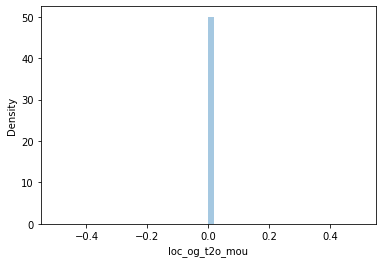

In [67]:
univariate(df.loc_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


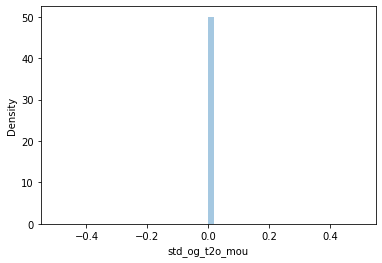

In [68]:
univariate(df.std_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_ic_t2o_mou, dtype: float64


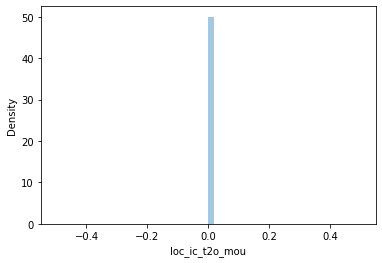

In [69]:
univariate(df.loc_ic_t2o_mou)

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


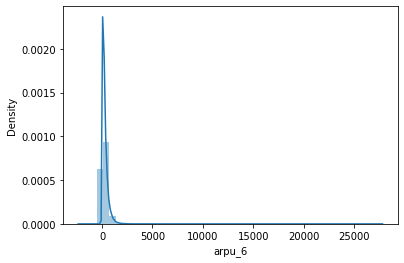

In [70]:
univariate(df.arpu_6)

count    69999.000000
mean       127.887939
std        295.115497
min          0.000000
25%          5.430000
50%         30.830000
75%        113.100000
max       7376.710000
Name: onnet_mou_6, dtype: float64


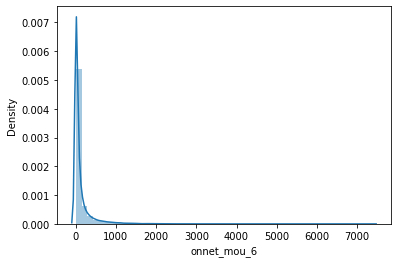

In [71]:
univariate(df.onnet_mou_6)

count    69999.000000
mean       128.754731
std        306.326345
min          0.000000
25%          4.910000
50%         29.160000
75%        108.940000
max       8157.780000
Name: onnet_mou_7, dtype: float64


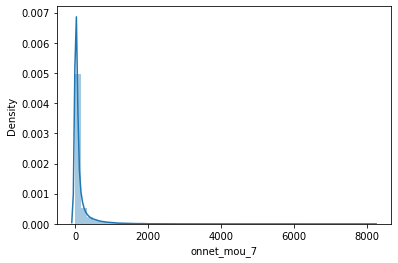

In [72]:
univariate(df.onnet_mou_7)

count    69999.000000
mean       125.943607
std        304.990552
min          0.000000
25%          4.110000
50%         27.840000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


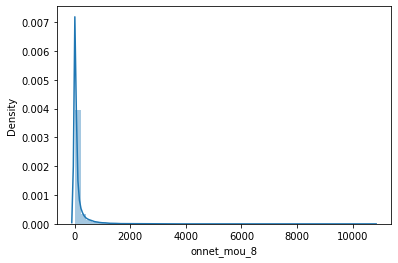

In [73]:
univariate(df.onnet_mou_8)

count    69999.000000
mean       135.486541
std        568.310234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30036.060000
Name: vol_3g_mb_8, dtype: float64


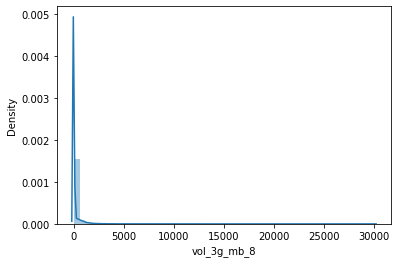

In [74]:
univariate(df.vol_3g_mb_8)

count    69999.000000
mean       128.934444
std        554.096072
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      28144.120000
Name: vol_3g_mb_7, dtype: float64


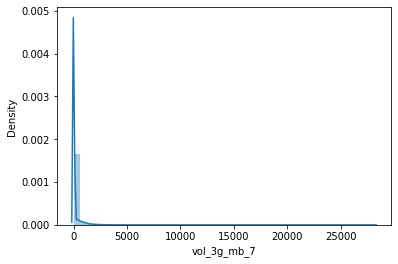

In [75]:
univariate(df.vol_3g_mb_7)

count    69999.000000
mean       122.171882
std        554.869965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      45735.400000
Name: vol_3g_mb_6, dtype: float64


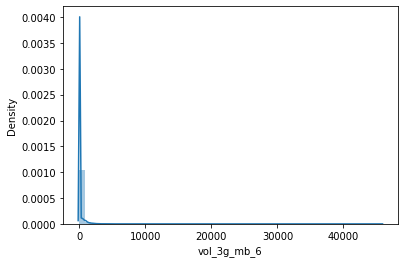

In [76]:
univariate(df.vol_3g_mb_6)

In [77]:
def bivariate(variable1, variable2):
    if(var_type(variable1) == 'numeric' and var_type(variable2) == 'numeric'):
        sns.regplot(variable1,variable2)
    elif(var_type(variable1) == 'numeric' and var_type(variable2) == 'category') or (var_type(variable1) == 'category' and var_type(variable2) == 'numeric'):
        sns.boxplot(variable1, variable2)
        

In [78]:
high_value_cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Data columns (total 151 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  int64  
 1   circle_id           int64  
 2   loc_og_t2o_mou      float64
 3   std_og_t2o_mou      float64
 4   loc_ic_t2o_mou      float64
 5   arpu_6              float64
 6   arpu_7              float64
 7   arpu_8              float64
 8   onnet_mou_6         float64
 9   onnet_mou_7         float64
 10  onnet_mou_8         float64
 11  offnet_mou_6        float64
 12  offnet_mou_7        float64
 13  offnet_mou_8        float64
 14  roam_ic_mou_6       float64
 15  roam_ic_mou_7       float64
 16  roam_ic_mou_8       float64
 17  roam_og_mou_6       float64
 18  roam_og_mou_7       float64
 19  roam_og_mou_8       float64
 20  loc_og_t2t_mou_6    float64
 21  loc_og_t2t_mou_7    float64
 22  loc_og_t2t_mou_8    float64
 23  loc_og_t2m_mou_6    float64
 24  loc_og_t2m_mou_7    float64

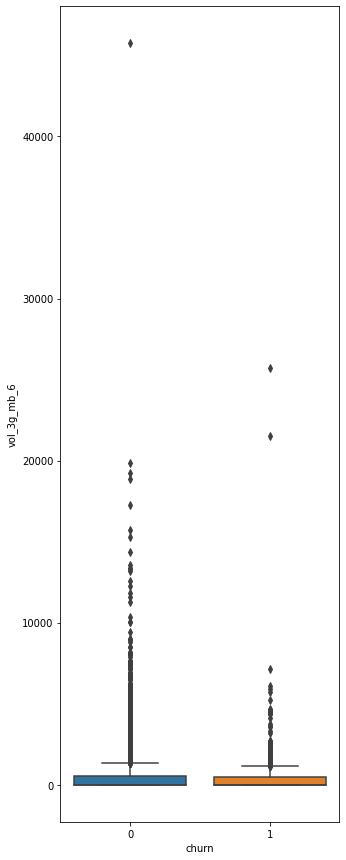

In [79]:
plt.figure(figsize=(5,15))
bivariate(high_val_cust.churn, high_val_cust.vol_3g_mb_6)

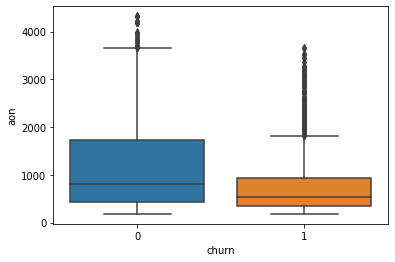

In [80]:
bivariate(high_val_cust.churn, high_val_cust.aon)

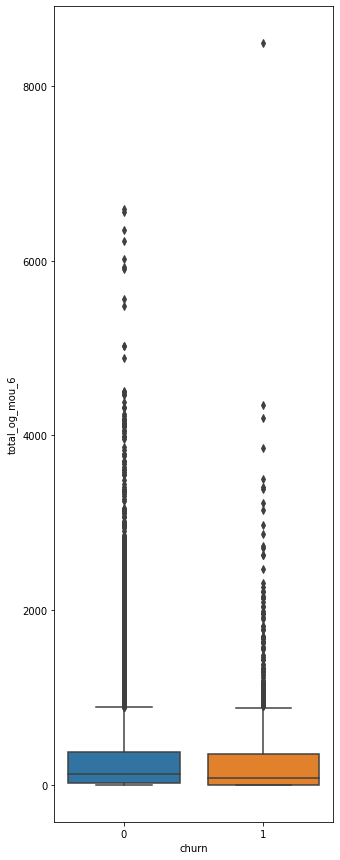

In [81]:
plt.figure(figsize=(5,15))
bivariate(high_val_cust.churn, high_val_cust.total_og_mou_6)

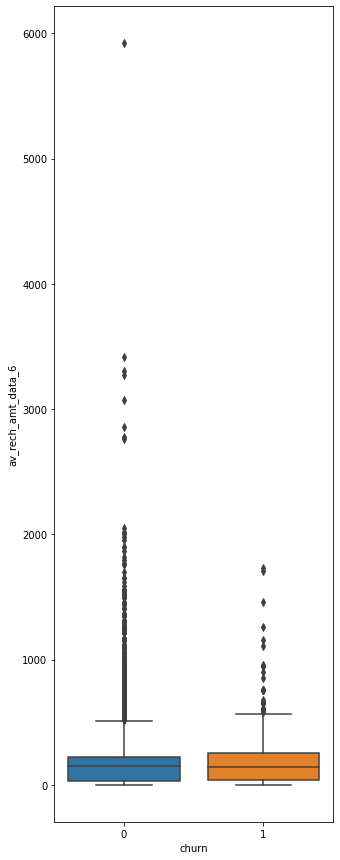

In [82]:
plt.figure(figsize=(5,15))
bivariate(high_val_cust.churn, high_val_cust.av_rech_amt_data_6)

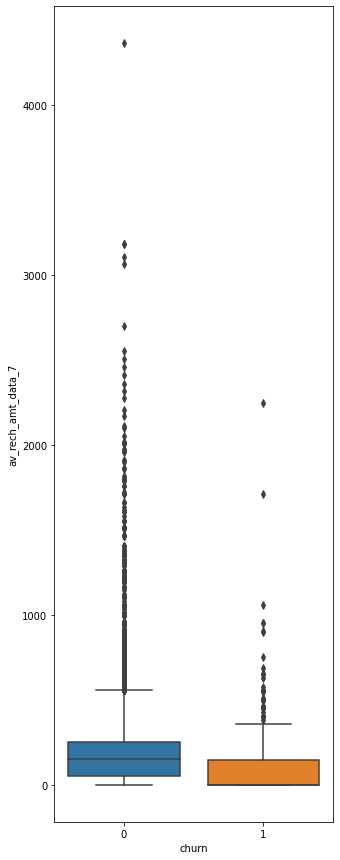

In [83]:
plt.figure(figsize=(5,15))
bivariate(high_val_cust.churn, high_val_cust.av_rech_amt_data_7)

### Outlier treatement

In [84]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [85]:
filtered_cust = high_val_cust

In [86]:
filtered_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Columns: 149 entries, id to churn
dtypes: category(7), float64(114), int64(28)
memory usage: 23.3 MB


In [87]:
print(filtered_cust.dtypes)

id                       int64
circle_id                int64
loc_og_t2o_mou         float64
std_og_t2o_mou         float64
loc_ic_t2o_mou         float64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2f_mou_6       float64
loc_og_t2f_mou_7       float64
loc_og_t2f_mou_8       float64
loc_og_t2c_mou_6       float64
loc_og_t2c_mou_7       float64
loc_og_t2c_mou_8       float64
loc_og_m

In [88]:
num_columns = filtered_cust.select_dtypes(include = np.number).columns.tolist()
num_columns

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og

In [89]:
filtered_cust[num_columns] = filtered_cust[num_columns].apply(cap_outliers, axis=0)

In [90]:
filtered_cust.describe(percentiles = [0.01,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,20641.000000,20641.0,20641.0,20641.0,20641.0,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.0,20641.0,20641.0,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.0,20641.0,20641.0,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000,20641.000000
mean,35050.591396,109.0,0.0,0.0,0.0,363.536891,364.310746,344.511499,105.210042,107.826252,99.903519,178.820967,179.063227,170.5

In [91]:
filtered_cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Data columns (total 149 columns):
 #   Column              Dtype   
---  ------              -----   
 0   id                  int64   
 1   circle_id           int64   
 2   loc_og_t2o_mou      float64 
 3   std_og_t2o_mou      float64 
 4   loc_ic_t2o_mou      float64 
 5   arpu_6              float64 
 6   arpu_7              float64 
 7   arpu_8              float64 
 8   onnet_mou_6         float64 
 9   onnet_mou_7         float64 
 10  onnet_mou_8         float64 
 11  offnet_mou_6        float64 
 12  offnet_mou_7        float64 
 13  offnet_mou_8        float64 
 14  roam_ic_mou_6       float64 
 15  roam_ic_mou_7       float64 
 16  roam_ic_mou_8       float64 
 17  roam_og_mou_6       float64 
 18  roam_og_mou_7       float64 
 19  roam_og_mou_8       float64 
 20  loc_og_t2t_mou_6    float64 
 21  loc_og_t2t_mou_7    float64 
 22  loc_og_t2t_mou_8    float64 
 23  loc_og_t2m_mou_6    float64 
 24  l

In [92]:
filtered_cust['churn'] = pd.to_numeric(filtered_cust['churn'])
filtered_cust.drop(['churn_probability'], axis = 1, inplace = True)

In [93]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [94]:
## Checking for difference in columns between test and the training data sets and dropping the difference columns 
test_cols_drop = test_df.columns.difference(filtered_cust.columns).tolist()
print(test_cols_drop)

['last_date_of_month_6']


In [95]:
test_df.drop(['last_date_of_month_6'], axis = 1, inplace = True)

In [96]:
test_cols_drop = test_df.columns.difference(filtered_cust.columns).tolist()
print(test_cols_drop)

[]


In [97]:
filtered_cust.isnull().sum()*100/filtered_cust.shape[0]

id                    0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_m

In [98]:
test_df.isnull().sum()*100/test_df.shape[0]

id                    0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_m

In [99]:
print(test_df.shape)

(30000, 148)


In [100]:
test_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn'],
      dtype='object', length=148)

In [101]:
X_train = filtered_cust.drop("churn", axis = 1)
y_train = filtered_cust.churn
X_test = test_df.drop("churn", axis = 1)
y_test = test_df.churn

In [102]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20641, 147)
(20641,)
(30000, 147)
(30000,)


### Aggregating Categorical Columns

In [103]:
train = pd.concat([X_train, y_train], axis=1)

# aggregating the categorical variables
train.groupby('night_pck_user_6').churn.mean()

night_pck_user_6
-1.0    0.052016
0.0     0.057426
1.0     0.079787
Name: churn, dtype: float64

In [104]:
train.groupby('night_pck_user_7').churn.mean()


night_pck_user_7
-1.0    0.162842
0.0     0.033985
1.0     0.030899
Name: churn, dtype: float64

In [105]:
train.groupby('night_pck_user_8').churn.mean()


night_pck_user_8
-1.0    0.176444
0.0     0.001231
1.0     0.000000
Name: churn, dtype: float64

In [106]:
train.groupby('fb_user_6').churn.mean()


fb_user_6
-1.0    0.052016
0.0     0.077053
1.0     0.056469
Name: churn, dtype: float64

In [107]:
train.groupby('fb_user_7').churn.mean()


fb_user_7
-1.0    0.162842
0.0     0.070953
1.0     0.030714
Name: churn, dtype: float64

In [108]:
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.176444
0.0     0.023161
1.0     0.000000
Name: churn, dtype: float64

In [109]:
mapping = {'night_pck_user_6' : {-1: 0.052016, 0: 0.057426, 1: 0.079787},
           'night_pck_user_7' : {-1: 0.162842, 0: 0.033985, 1: 0.030899},
           'night_pck_user_8' : {-1: 0.176444, 0: 0.001231, 1: 0.000000},
           'fb_user_6'        : {-1: 0.052016, 0: 0.077053, 1: 0.056469},
           'fb_user_7'        : {-1: 0.162842, 0: 0.070953, 1: 0.030714},
           'fb_user_8'        : {-1: 0.176444, 0: 0.023161, 1: 0.000000}
          }
X_train.replace(mapping, inplace = True)

In [110]:
X_test.replace(mapping, inplace = True)

In [111]:
# check data type of categorical columns - make sure they are numeric
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20641 entries, 1 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  20641 non-null  float64
 1   night_pck_user_7  20641 non-null  float64
 2   night_pck_user_8  20641 non-null  float64
 3   fb_user_6         20641 non-null  float64
 4   fb_user_7         20641 non-null  float64
 5   fb_user_8         20641 non-null  float64
dtypes: float64(6)
memory usage: 1.7 MB


## PCA

In [112]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [113]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [114]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       16.15
1       23.61
2       29.47
3       34.58
4       38.69
5       41.52
6       44.21
7       46.57
8       48.78
9       50.93
10      52.99
11      54.90
12      56.73
13      58.50
14      60.11
15      61.60
16      62.98
17      64.33
18      65.66
19      66.90
20      68.00
21      69.05
22      70.05
23      70.98
24      71.88
25      72.76
26      73.63
27      74.48
28      75.30
29      76.07
30      76.82
31      77.56
32      78.28
33      78.98
34      79.65
35      80.31
36      80.93
37      81.54
38      82.15
39      82.72
40      83.28
41      83.84
42      84.36
43      84.88
44      85.38
45      85.88
46      86.35
47      86.81
48      87.27
49      87.72
50      88.14
51      88.54
52      88.94
53      89.33
54      89.71
55      90.09
56      90.45
57      90.81
58      91.16
59      91.49
60      91.81
61      92.13
62      92.43
63      92.74
64      93.03
65      93.31
66      93.57
67      93.83
68      94.08
69      94.32
70      94.56
71    

    ~ 74 components explain 95% variance
    ~ 16 components explain 90% variance

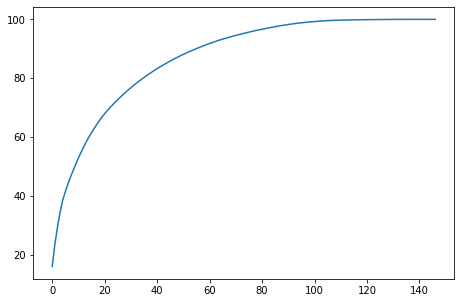

In [115]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(151/20,100/20)) # 100 elements on y-axis; 151 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

### PCA with Logistic Regression

In [116]:
# create pipeline
PCA_VARS = 56
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [117]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.96216268591638

### Evaluate on test data

In [118]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[26183  1399]
 [  575  1843]]
Sensitivity: 	0.76
Specificity: 	0.95
AUC:    	 0.97


### Hyperparameter tuning - PCA and Logistic Regression

In [119]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.94322
1    0.05678
Name: churn, dtype: float64

In [120]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [121]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [122]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.891896,0.112467,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,4.209785,0.139892,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,3.591062,0.156775,0.083370,0.008609,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.992329,0.989171,0.993288,0.990217,0.992014,0.991404,0.001495,16
3,4.835466,0.375426,0.115461,0.019056,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.992626,0.990709,0.992998,0.991191,0.992377,0.991980,0.000878,15
4,3.282899,0.255115,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
5,4.243320,0.168546,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
6,3.913018,0.113008,0.105488,0.028477,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.992668,0.991106,0.993650,0.991666,0.993354,0.992489,0.000971,14
7,5.066856,0.134229,0.101407,0.007688,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.994002,0.992917,0.993561,0.993244,0.993779,0.993501,0.000384,7
8,3.286685,0.318997,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
9,4.196657,0.172721,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,29


In [123]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9954373662667706
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [124]:
# predict churn on test data
y_pred = model.predict(X_test)

prediction = pd.DataFrame(y_pred, columns=['churn_probability']).to_csv('prediction1.csv')
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[26686   896]
 [  566  1852]]
Sensitivity: 	0.77
Specificity: 	0.97
AUC:    	 0.98


## Random Forest

In [125]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [126]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [127]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9999991220330203
Best hyperparameters:  {'criterion': 'gini', 'max_features': 0.4}


In [128]:
# predict churn on test data
y_pred = model.predict(X_test)

prediction = pd.DataFrame(y_pred, columns=['churn_probability']).to_csv('prediction2.csv')
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[27535    47]
 [  608  1810]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 1.0


### Random forest has low sensitivity, hence best model is PCA with logistic Regression

In [129]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [130]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.3s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [131]:
# OOB score
rf_model.oob_score_

0.9998546582045443

In [132]:
len(X_train.columns)

147

In [133]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

prediction = pd.DataFrame(y_pred, columns=['churn_probability']).to_csv('prediction3.csv')
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


[[27411   171]
 [  620  1798]]
Sensitivity: 	0.74
Specificity: 	0.99


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ROC:    	 1.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [134]:
# predictors
features = filtered_cust.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,1.391228e+01
1,total_og_mou_8,1.160936e+01
2,loc_ic_mou_8,9.961243e+00
3,loc_ic_t2t_mou_8,7.360179e+00
4,loc_og_t2m_mou_8,6.467032e+00
5,loc_ic_t2m_mou_8,6.173986e+00
6,fb_user_8,4.895887e+00
7,max_rech_amt_8,4.791346e+00
8,loc_og_t2t_mou_8,4.768386e+00
9,arpu_8,3.359145e+00


In [135]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

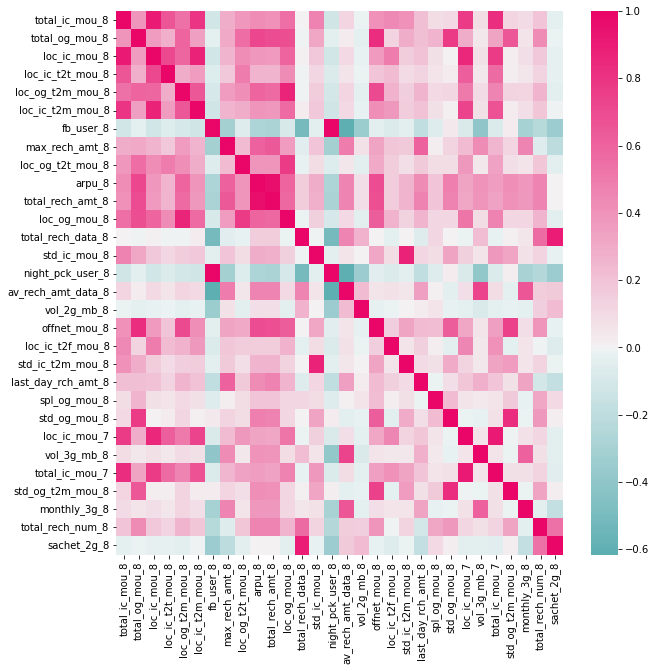

In [136]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [137]:
#Selecting top 11 features
top_features = ['total_ic_mou_8',
'total_og_mou_8',
'loc_ic_mou_8',
'loc_ic_t2t_mou_8',
'loc_og_t2m_mou_8',
'loc_ic_t2m_mou_8',
'fb_user_8',
'max_rech_amt_8',
'loc_og_t2t_mou_8',
'arpu_8',
'total_rech_amt_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [138]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [139]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [140]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9982636000797367
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [141]:
X_test

,total_ic_mou_8,total_og_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,fb_user_8,max_rech_amt_8,loc_og_t2t_mou_8,arpu_8,total_rech_amt_8
0,36.26,57.94,31.51,21.98,8.36,9.53,0.176444,30,21.06,64.445,60
1,281.66,415.59,187.43,2.61,377.26,184.81,0.176444,250,19.84,360.868,500
2,0.00,0.00,0.00,0.00,0.00,0.00,0.176444,500,0.00,746.239,1000
3,549.13,24.01,531.64,23.04,20.51,506.94,0.176444,0,0.00,24.400,0
4,159.26,779.78,17.61,9.91,10.94,7.69,0.000000,130,14.56,413.329,546
...,...,...,...,...,...,...,...,...,...,...,...
29995,663.88,507.38,636.28,281.24,193.58,344.29,0.000000,220,277.24,406.150,440
29996,81.93,840.03,58.78,13.99,13.03,25.49,0.176444,279,13.16,374.981,496
29997,20.36,49.64,16.08,10.44,25.06,5.63,0.000000,50,7.58,180.194,240
29998,9.26,332.63,9.26,0.00,26.76,9.26,0.176444,37,0.00,257.439,307


In [142]:
# predict churn on test data
y_pred = model.predict(X_test)

prediction = pd.DataFrame(y_pred, columns=['churn_probability']).to_csv('prediction4.csv')
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[26371  1211]
 [  651  1767]]
Sensitivity: 	0.73
Specificity: 	0.96
ROC:    	 0.98


In [143]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [144]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [145]:
# coefficients
coefficients = logistic_model.coef_.reshape((11, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [146]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_og_mou_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,fb_user_8,max_rech_amt_8,loc_og_t2t_mou_8,arpu_8,total_rech_amt_8
0,-49.71642,-14.460505,-11.776869,-11.490604,-6.605321,-7.552121,-12.452858,2.167267,-0.556761,-3.920186,-0.382796,0.382545


## Business Insights and Recomendations

The factors affecting churn are total_ic_mou_8, total_og_mou_8, loc_ic_t2t_mou_8, loc_og_t2m_mou_8, loc_ic_t2m_mou_8, fb_user_8, max_rech_amt_8, loc_og_t2t_mou_8, arpu_8, total_rech_amt_8

Some Recomendations which can be followed by the company:
- Give data packs which are specific to facebook usage, may be giving higher data limit for just using facebook
- Give discounts to consumers based on their usage and average recharge amount.
- Have a survey with customers on what is their requirements and what is their satisfaction rate with the network
- Lower tariffs on phone calls and internet usage